<a href="https://colab.research.google.com/github/rackhamsauer/Project_4/blob/stacie/Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [39]:
# Generate dummy dataset

In [40]:
from google.colab import drive
file_path = '/description.csv'
data = pd.read_csv(file_path)
data.head()


,id,screen_name,default_profile,description,created_at,geo_enabled,lang,statuses_count,followers_count,favourites_count,...,you,youll,young,your,youre,yourself,youth,youtube,youtuber,yrs
0,16282004,eckates,1,My name is Enrique! ! I'm a highly experienced...,2008-09-14 13:20:09,0,en,11405,819,0,...,0,0,0,0,0,0,0,0,0,0
1,16740486,genebailey,0,"Author, Speaker, Father, Friend, Motivator, Re...",2008-10-14 18:11:24,1,en,520,219,36,...,0,0,0,0,0,0,0,0,0,0
2,17132768,patrickghoward,0,Patrick G Howard is an experienced project & p...,2008-11-03 16:51:00,0,en,4671,38877,6,...,0,0,0,0,0,0,0,0,0,0
3,18013384,DoggieCakes,0,Dog Bakery and Boutique - Retail (Events and O...,2008-12-10 06:44:57,1,en,8512,2069,70,...,0,0,0,0,0,0,0,0,0,0
4,21331733,DavidVarrone,0,Home Based Business and Personal Development C...,2009-02-19 20:46:02,0,en,245,6656,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data_drop_df = pd.DataFrame(data)

In [42]:
object_columns = data_drop_df.select_dtypes(include=['object'])
print(object_columns)

          screen_name                                        description  \
0             eckates  My name is Enrique! ! I'm a highly experienced...   
1          genebailey  Author, Speaker, Father, Friend, Motivator, Re...   
2      patrickghoward  Patrick G Howard is an experienced project & p...   
3         DoggieCakes  Dog Bakery and Boutique - Retail (Events and O...   
4        DavidVarrone  Home Based Business and Personal Development C...   
...               ...                                                ...   
29939      butchsekab  Role: Stock Taker. Past Roles: Nanny, Sales As...   
29940     Mathieu_Era                    KINGDOM LANDLORD #FreeCornBread   
29941   SDalmaoficial  Bienvenid@s al Twitter Oficial de Sergio Dalma...   
29942     VinceYearly  Just a good guy wrapped up in a bad system.\nA...   
29943         zhemcom                                              你好！中国   

                created_at   lang  \
0      2008-09-14 13:20:09     en   
1      2008-1

In [ ]:
# Features (X)
#X = data_drop_df.drop(columns=['account_type'])

# Target (y)
#y = data_drop_df['account_type']

# Drop non numerical columns
#X = X.drop(columns=['screen_name', 'description', 'lang', 'cleaned_description'])

In [43]:
# Drop unnecessary columns and create feature matrix X and target vector y
X = data_drop_df.drop(columns=['account_type', 'screen_name', 'description', 'lang', 'cleaned_description'])
y = data_drop_df['account_type']

# Convert datetime column to datetime format
data_drop_df['created_at'] = pd.to_datetime(data_drop_df['created_at'])

# Extract relevant features from datetime
data_drop_df['year'] = data_drop_df['created_at'].dt.year
data_drop_df['month'] = data_drop_df['created_at'].dt.month
data_drop_df['day'] = data_drop_df['created_at'].dt.day
data_drop_df['hour'] = data_drop_df['created_at'].dt.hour
data_drop_df['minute'] = data_drop_df['created_at'].dt.minute

# Drop the original datetime column
data_drop_df.drop(columns=['created_at'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Drop the original datetime column from feature matrices
X_train.drop(columns=['created_at'], inplace=True)
X_test.drop(columns=['created_at'], inplace=True)

# Convert dataframe to numpy array for training and testing sets
X_train = X_train.values
X_test = X_test.values

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Create the Keras Sequential model
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(1507,), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [45]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=7, activation="relu", input_dim=2))

In [46]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                96512     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
 dense_15 (Dense)            (None, 7)                 14        
                                                                 
 dense_16 (Dense)            (None, 1)                 8         
                                                                 
Total params: 98647 (385.34 KB)
Trainable params: 98647 (385.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
702/702 [==============================] - 4s 5ms/step - loss: 0.6291 - accuracy: 0.7468
Epoch 2/100
702/702 [==============================] - 4s 6ms/step - loss: 0.5117 - accuracy: 0.8196
Epoch 3/100
702/702 [==============================] - 4s 5ms/step - loss: 0.4230 - accuracy: 0.8508
Epoch 4/100
702/702 [==============================] - 3s 5ms/step - loss: 0.3600 - accuracy: 0.8723
Epoch 5/100
702/702 [==============================] - 3s 5ms/step - loss: 0.3153 - accuracy: 0.8878
Epoch 6/100
702/702 [==============================] - 4s 6ms/step - loss: 0.2867 - accuracy: 0.8979
Epoch 7/100
702/702 [==============================] - 4s 5ms/step - loss: 0.2683 - accuracy: 0.9035
Epoch 8/100
702/702 [==============================] - 3s 5ms/step - loss: 0.2567 - accuracy: 0.9084
Epoch 9/100
702/702 [==============================] - 5s 6ms/step - loss: 0.2469 - accuracy: 0.9138
Epoch 10/100
702/702 [==============================] - 3s 5ms/step - loss: 0.2407 - accura

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

234/234 - 1s - loss: 0.6751 - accuracy: 0.7923 - 805ms/epoch - 3ms/step
Loss: 0.6751078367233276, Accuracy: 0.7922789454460144


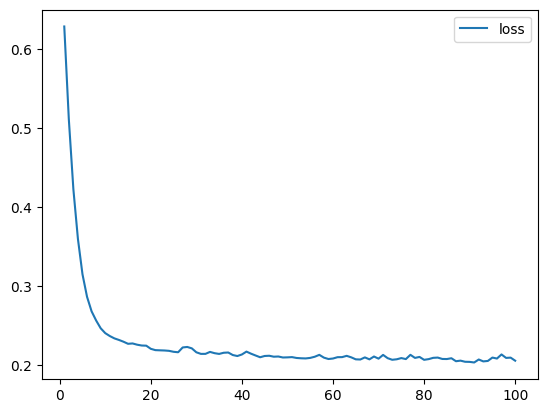

In [51]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

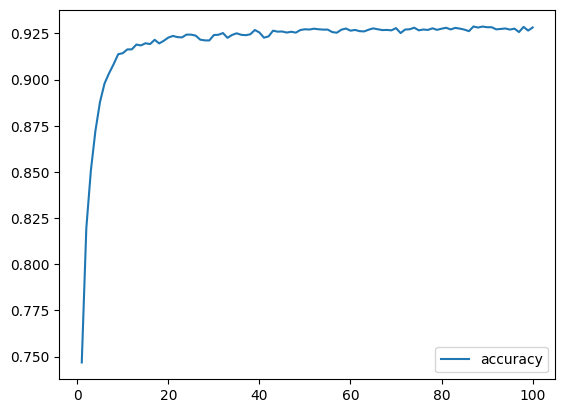

In [52]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()